In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy
import scipy.io as spio
import scipy.sparse as sp

import regex as re


In [2]:
#Load cached measurements

hek_df = pd.read_csv("apa_100_variants_rev2_20220621_hek293_v3_umi_mut_0.csv", sep='\t')
sknsh_df = pd.read_csv("apa_100_variants_rev2_20220621_sknsh_v3_umi_mut_0.csv", sep='\t')
hmc3_df = pd.read_csv("apa_100_variants_rev2_20220621_hmc3_v3_umi_mut_0.csv", sep='\t')


--- HEK293 ---
Wilcoxon statistic = -2.0682
Wilcoxon P-value = 0.038625305508977345
T-test statistic = -2.3702
T-test P-value = 0.02072423706876088
n1 / n2 = 34 / 36
--- SK-N-SH ---
Wilcoxon statistic = -2.1511
Wilcoxon P-value = 0.03146851890679132
T-test statistic = -2.187
T-test P-value = 0.032091653261210565
n1 / n2 = 36 / 36
--- HMC3 ---
Wilcoxon statistic = -2.016
Wilcoxon P-value = 0.04379985744145928
T-test statistic = -2.5153
T-test P-value = 0.014286754418166209
n1 / n2 = 32 / 38


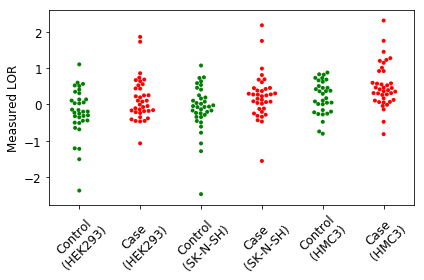

In [3]:
#Analyze measured ASD variants (controls / cases)

from scipy.stats import ranksums, ttest_ind

import seaborn as sns

save_figs = True
fig_name = "asd_measured_lor"

#HEK293 measurements
hek_min_c = 5.

hek_min_ref_prox_c = 5.
hek_min_var_prox_c = 1.

hek_filtered_df = hek_df.query("ref_count_total_repl_pooled >= " + str(hek_min_c) + " and " + "var_count_total_repl_pooled >= " + str(hek_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(hek_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(hek_min_var_prox_c))

hek_x1_true = np.array(hek_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_true_0_205_repl_pooled'].values)
hek_x2_true = np.array(hek_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_true_0_205_repl_pooled'].values)

hek_x1_pred = np.array(hek_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_0_205'].values)
hek_x2_pred = np.array(hek_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_0_205'].values)

wilcoxon_s_hek, wilcoxon_p_hek = ranksums(hek_x1_true, hek_x2_true)
ttest_s_hek, ttest_p_hek = ttest_ind(hek_x1_true, hek_x2_true, equal_var=False)

print("--- HEK293 ---")
print("Wilcoxon statistic = " + str(round(wilcoxon_s_hek, 4)))
print("Wilcoxon P-value = " + str(wilcoxon_p_hek))
print("T-test statistic = " + str(round(ttest_s_hek, 4)))
print("T-test P-value = " + str(ttest_p_hek))
print("n1 / n2 = " + str(hek_x1_true.shape[0]) + " / " + str(hek_x2_true.shape[0]))

#SK-N-SH measurements
sknsh_min_c = 5.

sknsh_min_ref_prox_c = 5.
sknsh_min_var_prox_c = 1.

sknsh_filtered_df = sknsh_df.query("ref_count_total_repl_pooled >= " + str(sknsh_min_c) + " and " + "var_count_total_repl_pooled >= " + str(sknsh_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(sknsh_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(sknsh_min_var_prox_c))

sknsh_x1_true = np.array(sknsh_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_true_0_205_repl_pooled'].values)
sknsh_x2_true = np.array(sknsh_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_true_0_205_repl_pooled'].values)

sknsh_x1_pred = np.array(sknsh_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_0_205'].values)
sknsh_x2_pred = np.array(sknsh_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_0_205'].values)

wilcoxon_s_sknsh, wilcoxon_p_sknsh = ranksums(sknsh_x1_true, sknsh_x2_true)
ttest_s_sknsh, ttest_p_sknsh = ttest_ind(sknsh_x1_true, sknsh_x2_true, equal_var=False)

print("--- SK-N-SH ---")
print("Wilcoxon statistic = " + str(round(wilcoxon_s_sknsh, 4)))
print("Wilcoxon P-value = " + str(wilcoxon_p_sknsh))
print("T-test statistic = " + str(round(ttest_s_sknsh, 4)))
print("T-test P-value = " + str(ttest_p_sknsh))
print("n1 / n2 = " + str(sknsh_x1_true.shape[0]) + " / " + str(sknsh_x2_true.shape[0]))

#HMC3 measurements
hmc3_min_c = 5.

hmc3_min_ref_prox_c = 5.
hmc3_min_var_prox_c = 1.

hmc3_filtered_df = hmc3_df.query("ref_count_total_repl_pooled >= " + str(hmc3_min_c) + " and " + "var_count_total_repl_pooled >= " + str(hmc3_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(hmc3_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(hmc3_min_var_prox_c))

hmc3_x1_true = np.array(hmc3_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_true_0_205_repl_pooled'].values)
hmc3_x2_true = np.array(hmc3_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_true_0_205_repl_pooled'].values)

hmc3_x1_pred = np.array(hmc3_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_0_205'].values)
hmc3_x2_pred = np.array(hmc3_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_0_205'].values)

wilcoxon_s_hmc3, wilcoxon_p_hmc3 = ranksums(hmc3_x1_true, hmc3_x2_true)
ttest_s_hmc3, ttest_p_hmc3 = ttest_ind(hmc3_x1_true, hmc3_x2_true, equal_var=False)

print("--- HMC3 ---")
print("Wilcoxon statistic = " + str(round(wilcoxon_s_hmc3, 4)))
print("Wilcoxon P-value = " + str(wilcoxon_p_hmc3))
print("T-test statistic = " + str(round(ttest_s_hmc3, 4)))
print("T-test P-value = " + str(ttest_p_hmc3))
print("n1 / n2 = " + str(hmc3_x1_true.shape[0]) + " / " + str(hmc3_x2_true.shape[0]))

#Visualize measurements (controls / cases)

f = plt.figure(figsize=(6, 4))

sns.swarmplot(data=[
    hek_x1_true,
    hek_x2_true,
    sknsh_x1_true,
    sknsh_x2_true,
    hmc3_x1_true,
    hmc3_x2_true,
], palette=['green', 'red', 'green', 'red', 'green', 'red'], size=4)

plt.xticks([0, 1, 2, 3, 4, 5], ["Control\n(HEK293)", "Case\n(HEK293)", "Control\n(SK-N-SH)", "Case\n(SK-N-SH)", "Control\n(HMC3)", "Case\n(HMC3)"], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.ylabel("Measured LOR", fontsize=12)

plt.tight_layout()

if save_figs :
    plt.savefig(fig_name + ".png", dpi=600, transparent=True)
    plt.savefig(fig_name + ".eps")

plt.show()


--- HEK293 ---
Wilcoxon statistic = -2.0682
Wilcoxon P-value = 0.038625305508977345
T-test statistic = -2.3702
T-test P-value = 0.02072423706876088
n1 / n2 = 34 / 36
--- SK-N-SH ---
Wilcoxon statistic = -2.2092
Wilcoxon P-value = 0.027163012509820155
T-test statistic = -2.2266
T-test P-value = 0.02931270488852479
n1 / n2 = 34 / 36
--- HMC3 ---
Wilcoxon statistic = -2.1379
Wilcoxon P-value = 0.03252418126532747
T-test statistic = -2.6009
T-test P-value = 0.011530170287279982
n1 / n2 = 32 / 36


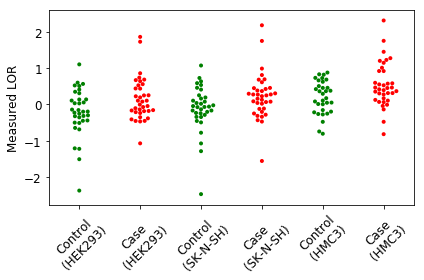

In [4]:
#Analyze measured ASD variants (controls / cases), more stringent filtering (except low-count HEK293 data)

from scipy.stats import ranksums, ttest_ind

import seaborn as sns

save_figs = True
fig_name = "asd_measured_lor_stringent_filtering"

#HEK293 measurements
hek_min_c = 5.

hek_min_ref_prox_c = 5.
hek_min_var_prox_c = 1.

hek_filtered_df = hek_df.query("ref_count_total_repl_pooled >= " + str(hek_min_c) + " and " + "var_count_total_repl_pooled >= " + str(hek_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(hek_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(hek_min_var_prox_c))

hek_x1_true = np.array(hek_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_true_0_205_repl_pooled'].values)
hek_x2_true = np.array(hek_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_true_0_205_repl_pooled'].values)

hek_x1_pred = np.array(hek_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_0_205'].values)
hek_x2_pred = np.array(hek_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_0_205'].values)

wilcoxon_s_hek, wilcoxon_p_hek = ranksums(hek_x1_true, hek_x2_true)
ttest_s_hek, ttest_p_hek = ttest_ind(hek_x1_true, hek_x2_true, equal_var=False)

print("--- HEK293 ---")
print("Wilcoxon statistic = " + str(round(wilcoxon_s_hek, 4)))
print("Wilcoxon P-value = " + str(wilcoxon_p_hek))
print("T-test statistic = " + str(round(ttest_s_hek, 4)))
print("T-test P-value = " + str(ttest_p_hek))
print("n1 / n2 = " + str(hek_x1_true.shape[0]) + " / " + str(hek_x2_true.shape[0]))

#SK-N-SH measurements
sknsh_min_c = 10.

sknsh_min_ref_prox_c = 5.
sknsh_min_var_prox_c = 5.

sknsh_filtered_df = sknsh_df.query("ref_count_total_repl_pooled >= " + str(sknsh_min_c) + " and " + "var_count_total_repl_pooled >= " + str(sknsh_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(sknsh_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(sknsh_min_var_prox_c))

sknsh_x1_true = np.array(sknsh_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_true_0_205_repl_pooled'].values)
sknsh_x2_true = np.array(sknsh_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_true_0_205_repl_pooled'].values)

sknsh_x1_pred = np.array(sknsh_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_0_205'].values)
sknsh_x2_pred = np.array(sknsh_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_0_205'].values)

wilcoxon_s_sknsh, wilcoxon_p_sknsh = ranksums(sknsh_x1_true, sknsh_x2_true)
ttest_s_sknsh, ttest_p_sknsh = ttest_ind(sknsh_x1_true, sknsh_x2_true, equal_var=False)

print("--- SK-N-SH ---")
print("Wilcoxon statistic = " + str(round(wilcoxon_s_sknsh, 4)))
print("Wilcoxon P-value = " + str(wilcoxon_p_sknsh))
print("T-test statistic = " + str(round(ttest_s_sknsh, 4)))
print("T-test P-value = " + str(ttest_p_sknsh))
print("n1 / n2 = " + str(sknsh_x1_true.shape[0]) + " / " + str(sknsh_x2_true.shape[0]))

#HMC3 measurements
hmc3_min_c = 10.

hmc3_min_ref_prox_c = 5.
hmc3_min_var_prox_c = 5.

hmc3_filtered_df = hmc3_df.query("ref_count_total_repl_pooled >= " + str(hmc3_min_c) + " and " + "var_count_total_repl_pooled >= " + str(hmc3_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(hmc3_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(hmc3_min_var_prox_c))

hmc3_x1_true = np.array(hmc3_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_true_0_205_repl_pooled'].values)
hmc3_x2_true = np.array(hmc3_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_true_0_205_repl_pooled'].values)

hmc3_x1_pred = np.array(hmc3_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_0_205'].values)
hmc3_x2_pred = np.array(hmc3_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_0_205'].values)

wilcoxon_s_hmc3, wilcoxon_p_hmc3 = ranksums(hmc3_x1_true, hmc3_x2_true)
ttest_s_hmc3, ttest_p_hmc3 = ttest_ind(hmc3_x1_true, hmc3_x2_true, equal_var=False)

print("--- HMC3 ---")
print("Wilcoxon statistic = " + str(round(wilcoxon_s_hmc3, 4)))
print("Wilcoxon P-value = " + str(wilcoxon_p_hmc3))
print("T-test statistic = " + str(round(ttest_s_hmc3, 4)))
print("T-test P-value = " + str(ttest_p_hmc3))
print("n1 / n2 = " + str(hmc3_x1_true.shape[0]) + " / " + str(hmc3_x2_true.shape[0]))

#Visualize measurements (controls / cases)

f = plt.figure(figsize=(6, 4))

sns.swarmplot(data=[
    hek_x1_true,
    hek_x2_true,
    sknsh_x1_true,
    sknsh_x2_true,
    hmc3_x1_true,
    hmc3_x2_true,
], palette=['green', 'red', 'green', 'red', 'green', 'red'], size=4)

plt.xticks([0, 1, 2, 3, 4, 5], ["Control\n(HEK293)", "Case\n(HEK293)", "Control\n(SK-N-SH)", "Case\n(SK-N-SH)", "Control\n(HMC3)", "Case\n(HMC3)"], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.ylabel("Measured LOR", fontsize=12)

plt.tight_layout()

if save_figs :
    plt.savefig(fig_name + ".png", dpi=600, transparent=True)
    plt.savefig(fig_name + ".eps")

plt.show()


--- HEK293 ---
Wilcoxon statistic = -2.0682
Wilcoxon P-value = 0.038625305508977345
T-test statistic = -2.3702
T-test P-value = 0.02072423706876088
n1 / n2 = 34 / 36
--- SK-N-SH ---
Wilcoxon statistic = -2.1511
Wilcoxon P-value = 0.03146851890679132
T-test statistic = -2.187
T-test P-value = 0.032091653261210565
n1 / n2 = 36 / 36
--- HMC3 ---
Wilcoxon statistic = -2.016
Wilcoxon P-value = 0.04379985744145928
T-test statistic = -2.5153
T-test P-value = 0.014286754418166209
n1 / n2 = 32 / 38
--- Average across cell lines ---
Wilcoxon statistic = -2.6675
Wilcoxon P-value = 0.007642882836288566
T-test statistic = -2.7049
T-test P-value = 0.00862842500296053
n1 / n2 = 34 / 36


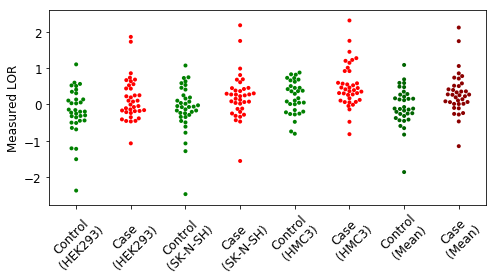

In [5]:
#Analyze measured ASD variants (controls / cases), include average measurements across cell lines

from scipy.stats import ranksums, ttest_ind

import seaborn as sns

save_figs = True
fig_name = "asd_measured_lor_w_avg_cell_line"

#HEK293 measurements
hek_min_c = 5.

hek_min_ref_prox_c = 5.
hek_min_var_prox_c = 1.

hek_filtered_df = hek_df.query("ref_count_total_repl_pooled >= " + str(hek_min_c) + " and " + "var_count_total_repl_pooled >= " + str(hek_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(hek_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(hek_min_var_prox_c))

hek_x1_true = np.array(hek_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_true_0_205_repl_pooled'].values)
hek_x2_true = np.array(hek_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_true_0_205_repl_pooled'].values)

hek_x1_pred = np.array(hek_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_0_205'].values)
hek_x2_pred = np.array(hek_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_0_205'].values)

wilcoxon_s_hek, wilcoxon_p_hek = ranksums(hek_x1_true, hek_x2_true)
ttest_s_hek, ttest_p_hek = ttest_ind(hek_x1_true, hek_x2_true, equal_var=False)

print("--- HEK293 ---")
print("Wilcoxon statistic = " + str(round(wilcoxon_s_hek, 4)))
print("Wilcoxon P-value = " + str(wilcoxon_p_hek))
print("T-test statistic = " + str(round(ttest_s_hek, 4)))
print("T-test P-value = " + str(ttest_p_hek))
print("n1 / n2 = " + str(hek_x1_true.shape[0]) + " / " + str(hek_x2_true.shape[0]))

#SK-N-SH measurements
sknsh_min_c = 5.

sknsh_min_ref_prox_c = 5.
sknsh_min_var_prox_c = 1.

sknsh_filtered_df = sknsh_df.query("ref_count_total_repl_pooled >= " + str(sknsh_min_c) + " and " + "var_count_total_repl_pooled >= " + str(sknsh_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(sknsh_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(sknsh_min_var_prox_c))

sknsh_x1_true = np.array(sknsh_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_true_0_205_repl_pooled'].values)
sknsh_x2_true = np.array(sknsh_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_true_0_205_repl_pooled'].values)

sknsh_x1_pred = np.array(sknsh_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_0_205'].values)
sknsh_x2_pred = np.array(sknsh_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_0_205'].values)

wilcoxon_s_sknsh, wilcoxon_p_sknsh = ranksums(sknsh_x1_true, sknsh_x2_true)
ttest_s_sknsh, ttest_p_sknsh = ttest_ind(sknsh_x1_true, sknsh_x2_true, equal_var=False)

print("--- SK-N-SH ---")
print("Wilcoxon statistic = " + str(round(wilcoxon_s_sknsh, 4)))
print("Wilcoxon P-value = " + str(wilcoxon_p_sknsh))
print("T-test statistic = " + str(round(ttest_s_sknsh, 4)))
print("T-test P-value = " + str(ttest_p_sknsh))
print("n1 / n2 = " + str(sknsh_x1_true.shape[0]) + " / " + str(sknsh_x2_true.shape[0]))

#HMC3 measurements
hmc3_min_c = 5.

hmc3_min_ref_prox_c = 5.
hmc3_min_var_prox_c = 1.

hmc3_filtered_df = hmc3_df.query("ref_count_total_repl_pooled >= " + str(hmc3_min_c) + " and " + "var_count_total_repl_pooled >= " + str(hmc3_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(hmc3_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(hmc3_min_var_prox_c))

hmc3_x1_true = np.array(hmc3_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_true_0_205_repl_pooled'].values)
hmc3_x2_true = np.array(hmc3_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_true_0_205_repl_pooled'].values)

hmc3_x1_pred = np.array(hmc3_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_0_205'].values)
hmc3_x2_pred = np.array(hmc3_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_0_205'].values)

wilcoxon_s_hmc3, wilcoxon_p_hmc3 = ranksums(hmc3_x1_true, hmc3_x2_true)
ttest_s_hmc3, ttest_p_hmc3 = ttest_ind(hmc3_x1_true, hmc3_x2_true, equal_var=False)

print("--- HMC3 ---")
print("Wilcoxon statistic = " + str(round(wilcoxon_s_hmc3, 4)))
print("Wilcoxon P-value = " + str(wilcoxon_p_hmc3))
print("T-test statistic = " + str(round(ttest_s_hmc3, 4)))
print("T-test P-value = " + str(ttest_p_hmc3))
print("n1 / n2 = " + str(hmc3_x1_true.shape[0]) + " / " + str(hmc3_x2_true.shape[0]))

#Join individual filtered dataframes (outer)
filtered_df = hek_filtered_df.join(sknsh_filtered_df, how='outer', rsuffix='_sknsh')
filtered_df = filtered_df.join(hmc3_filtered_df, how='outer', rsuffix='_hmc3').copy()

#Compute average measurements
def _calc_avg_delta_logodds_true_0_205(row) :
    
    sum_delta_logodds_true_0_205_repl_pooled = 0.
    n_delta_logodds_true_0_205_repl_pooled = 0.

    if not np.isnan(row['delta_logodds_true_0_205_repl_pooled']) :
        sum_delta_logodds_true_0_205_repl_pooled += row['delta_logodds_true_0_205_repl_pooled']
        n_delta_logodds_true_0_205_repl_pooled += 1.
    
    if not np.isnan(row['delta_logodds_true_0_205_repl_pooled_sknsh']) :
        sum_delta_logodds_true_0_205_repl_pooled += row['delta_logodds_true_0_205_repl_pooled_sknsh']
        n_delta_logodds_true_0_205_repl_pooled += 1.
    
    if not np.isnan(row['delta_logodds_true_0_205_repl_pooled_hmc3']) :
        sum_delta_logodds_true_0_205_repl_pooled += row['delta_logodds_true_0_205_repl_pooled_hmc3']
        n_delta_logodds_true_0_205_repl_pooled += 1.

    return sum_delta_logodds_true_0_205_repl_pooled / n_delta_logodds_true_0_205_repl_pooled

filtered_df['mean_delta_logodds_true_0_205_repl_pooled'] = filtered_df.apply(_calc_avg_delta_logodds_true_0_205, axis=1)

#Get mean measurements
x1_true = np.array(filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['mean_delta_logodds_true_0_205_repl_pooled'].values)
x2_true = np.array(filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['mean_delta_logodds_true_0_205_repl_pooled'].values)

wilcoxon_s, wilcoxon_p = ranksums(x1_true, x2_true)
ttest_s, ttest_p = ttest_ind(x1_true, x2_true, equal_var=False)

print("--- Average across cell lines ---")
print("Wilcoxon statistic = " + str(round(wilcoxon_s, 4)))
print("Wilcoxon P-value = " + str(wilcoxon_p))
print("T-test statistic = " + str(round(ttest_s, 4)))
print("T-test P-value = " + str(ttest_p))
print("n1 / n2 = " + str(x1_true.shape[0]) + " / " + str(x2_true.shape[0]))

#Visualize measurements (controls / cases)

f = plt.figure(figsize=(7, 4))

sns.swarmplot(data=[
    hek_x1_true,
    hek_x2_true,
    sknsh_x1_true,
    sknsh_x2_true,
    hmc3_x1_true,
    hmc3_x2_true,
    x1_true,
    x2_true,
], palette=['green', 'red', 'green', 'red', 'green', 'red', 'darkgreen', 'darkred'], size=4)

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ["Control\n(HEK293)", "Case\n(HEK293)", "Control\n(SK-N-SH)", "Case\n(SK-N-SH)", "Control\n(HMC3)", "Case\n(HMC3)", "Control\n(Mean)", "Case\n(Mean)"], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.ylabel("Measured LOR", fontsize=12)

plt.tight_layout()

if save_figs :
    plt.savefig(fig_name + ".png", dpi=600, transparent=True)
    plt.savefig(fig_name + ".eps")

plt.show()


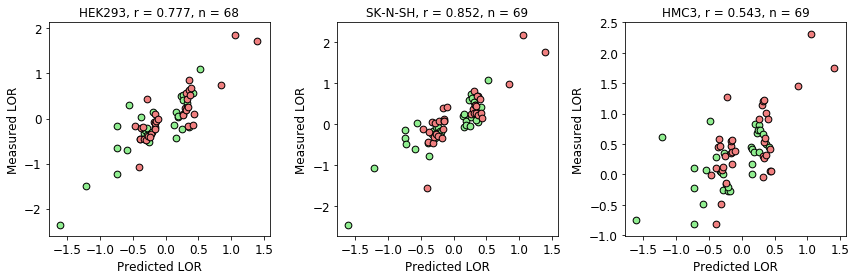

In [6]:
#Compare predictions vs. measurements, ASD variants (controls / cases), 0 to 205

from scipy.stats import spearmanr

save_figs = True
fig_name = "asd_predicted_vs_measured_lor_0_205"

#HEK293 measurements
hek_min_c = 50.

hek_min_ref_prox_c = 5.
hek_min_var_prox_c = 1.

hek_filtered_df = hek_df.query("ref_count_total_repl_pooled >= " + str(hek_min_c) + " and " + "var_count_total_repl_pooled >= " + str(hek_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(hek_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(hek_min_var_prox_c))

hek_x1_true = np.array(hek_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_true_0_205_repl_pooled'].values)
hek_x2_true = np.array(hek_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_true_0_205_repl_pooled'].values)

hek_x1_pred = np.array(hek_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_0_205'].values)
hek_x2_pred = np.array(hek_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_0_205'].values)

#SK-N-SH measurements
sknsh_min_c = 50.

sknsh_min_ref_prox_c = 5.
sknsh_min_var_prox_c = 1.

sknsh_filtered_df = sknsh_df.query("ref_count_total_repl_pooled >= " + str(sknsh_min_c) + " and " + "var_count_total_repl_pooled >= " + str(sknsh_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(sknsh_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(sknsh_min_var_prox_c))

sknsh_x1_true = np.array(sknsh_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_true_0_205_repl_pooled'].values)
sknsh_x2_true = np.array(sknsh_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_true_0_205_repl_pooled'].values)

sknsh_x1_pred = np.array(sknsh_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_0_205'].values)
sknsh_x2_pred = np.array(sknsh_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_0_205'].values)

#HMC3 measurements
hmc3_min_c = 50.

hmc3_min_ref_prox_c = 5.
hmc3_min_var_prox_c = 1.

hmc3_filtered_df = hmc3_df.query("ref_count_total_repl_pooled >= " + str(hmc3_min_c) + " and " + "var_count_total_repl_pooled >= " + str(hmc3_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(hmc3_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(hmc3_min_var_prox_c))

hmc3_x1_true = np.array(hmc3_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_true_0_205_repl_pooled'].values)
hmc3_x2_true = np.array(hmc3_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_true_0_205_repl_pooled'].values)

hmc3_x1_pred = np.array(hmc3_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_0_205'].values)
hmc3_x2_pred = np.array(hmc3_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_0_205'].values)

r_val_hek, _ = spearmanr(np.concatenate([hek_x1_pred, hek_x2_pred], axis=0), np.concatenate([hek_x1_true, hek_x2_true], axis=0))
r_val_sknsh, _ = spearmanr(np.concatenate([sknsh_x1_pred, sknsh_x2_pred], axis=0), np.concatenate([sknsh_x1_true, sknsh_x2_true], axis=0))
r_val_hmc3, _ = spearmanr(np.concatenate([hmc3_x1_pred, hmc3_x2_pred], axis=0), np.concatenate([hmc3_x1_true, hmc3_x2_true], axis=0))

f, ax = plt.subplots(1, 3, figsize=(12, 4))

#Plot HEK293 measurements
plt.sca(ax[0])

plt.scatter(hek_x1_pred, hek_x1_true, color='lightgreen', s=45, edgecolor='black', linewidth=1)
plt.scatter(hek_x2_pred, hek_x2_true, color='lightcoral', s=45, edgecolor='black', linewidth=1)

#plt.xlim(x_min, x_max)
#plt.ylim(x_min, x_max)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Predicted LOR", fontsize=12)
plt.ylabel("Measured LOR", fontsize=12)

plt.title("HEK293, r = " + str(round(r_val_hek, 3)) + ", n = " + str(np.concatenate([hek_x1_pred, hek_x2_pred], axis=0).shape[0]), fontsize=12)

#Plot SK-N-SH measurements
plt.sca(ax[1])

plt.scatter(sknsh_x1_pred, sknsh_x1_true, color='lightgreen', s=45, edgecolor='black', linewidth=1)
plt.scatter(sknsh_x2_pred, sknsh_x2_true, color='lightcoral', s=45, edgecolor='black', linewidth=1)

#plt.xlim(x_min, x_max)
#plt.ylim(x_min, x_max)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Predicted LOR", fontsize=12)
plt.ylabel("Measured LOR", fontsize=12)

plt.title("SK-N-SH, r = " + str(round(r_val_sknsh, 3)) + ", n = " + str(np.concatenate([sknsh_x1_pred, sknsh_x2_pred], axis=0).shape[0]), fontsize=12)

#Plot HMC3 measurements
plt.sca(ax[2])

plt.scatter(hmc3_x1_pred, hmc3_x1_true, color='lightgreen', s=45, edgecolor='black', linewidth=1)
plt.scatter(hmc3_x2_pred, hmc3_x2_true, color='lightcoral', s=45, edgecolor='black', linewidth=1)

#plt.xlim(x_min, x_max)
#plt.ylim(x_min, x_max)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Predicted LOR", fontsize=12)
plt.ylabel("Measured LOR", fontsize=12)

plt.title("HMC3, r = " + str(round(r_val_hmc3, 3)) + ", n = " + str(np.concatenate([hmc3_x1_pred, hmc3_x2_pred], axis=0).shape[0]), fontsize=12)

plt.tight_layout()

if save_figs :
    plt.savefig(fig_name + ".png", dpi=600, transparent=True)
    plt.savefig(fig_name + ".eps")

plt.show()


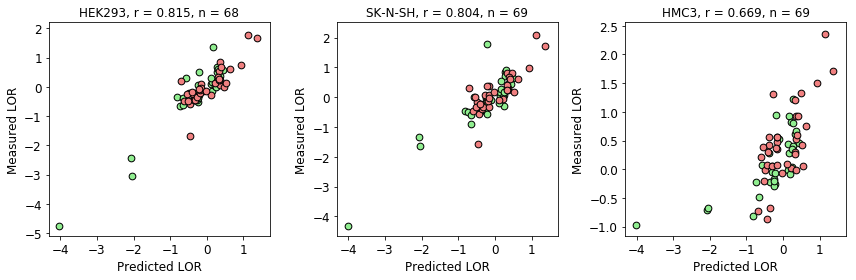

In [7]:
#Compare predictions vs. measurements, ASD variants (controls / cases), 77 to 127

from scipy.stats import spearmanr

save_figs = True
fig_name = "asd_predicted_vs_measured_lor_77_127"

#HEK293 measurements
hek_min_c = 50.

hek_min_ref_prox_c = 5.
hek_min_var_prox_c = 1.

hek_filtered_df = hek_df.query("ref_count_total_repl_pooled >= " + str(hek_min_c) + " and " + "var_count_total_repl_pooled >= " + str(hek_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(hek_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(hek_min_var_prox_c))

hek_x1_true = np.array(hek_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_true_77_127_repl_pooled'].values)
hek_x2_true = np.array(hek_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_true_77_127_repl_pooled'].values)

hek_x1_pred = np.array(hek_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_77_127'].values)
hek_x2_pred = np.array(hek_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_77_127'].values)

#SK-N-SH measurements
sknsh_min_c = 50.

sknsh_min_ref_prox_c = 5.
sknsh_min_var_prox_c = 1.

sknsh_filtered_df = sknsh_df.query("ref_count_total_repl_pooled >= " + str(sknsh_min_c) + " and " + "var_count_total_repl_pooled >= " + str(sknsh_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(sknsh_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(sknsh_min_var_prox_c))

sknsh_x1_true = np.array(sknsh_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_true_77_127_repl_pooled'].values)
sknsh_x2_true = np.array(sknsh_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_true_77_127_repl_pooled'].values)

sknsh_x1_pred = np.array(sknsh_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_77_127'].values)
sknsh_x2_pred = np.array(sknsh_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_77_127'].values)

#HMC3 measurements
hmc3_min_c = 50.

hmc3_min_ref_prox_c = 5.
hmc3_min_var_prox_c = 1.

hmc3_filtered_df = hmc3_df.query("ref_count_total_repl_pooled >= " + str(hmc3_min_c) + " and " + "var_count_total_repl_pooled >= " + str(hmc3_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(hmc3_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(hmc3_min_var_prox_c))

hmc3_x1_true = np.array(hmc3_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_true_77_127_repl_pooled'].values)
hmc3_x2_true = np.array(hmc3_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_true_77_127_repl_pooled'].values)

hmc3_x1_pred = np.array(hmc3_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_control'")['delta_logodds_77_127'].values)
hmc3_x2_pred = np.array(hmc3_filtered_df.query("data_source == 'ASD_1' and experiment == 'variant_case'")['delta_logodds_77_127'].values)

r_val_hek, _ = spearmanr(np.concatenate([hek_x1_pred, hek_x2_pred], axis=0), np.concatenate([hek_x1_true, hek_x2_true], axis=0))
r_val_sknsh, _ = spearmanr(np.concatenate([sknsh_x1_pred, sknsh_x2_pred], axis=0), np.concatenate([sknsh_x1_true, sknsh_x2_true], axis=0))
r_val_hmc3, _ = spearmanr(np.concatenate([hmc3_x1_pred, hmc3_x2_pred], axis=0), np.concatenate([hmc3_x1_true, hmc3_x2_true], axis=0))

f, ax = plt.subplots(1, 3, figsize=(12, 4))

#Plot HEK293 measurements
plt.sca(ax[0])

plt.scatter(hek_x1_pred, hek_x1_true, color='lightgreen', s=45, edgecolor='black', linewidth=1)
plt.scatter(hek_x2_pred, hek_x2_true, color='lightcoral', s=45, edgecolor='black', linewidth=1)

#plt.xlim(x_min, x_max)
#plt.ylim(x_min, x_max)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Predicted LOR", fontsize=12)
plt.ylabel("Measured LOR", fontsize=12)

plt.title("HEK293, r = " + str(round(r_val_hek, 3)) + ", n = " + str(np.concatenate([hek_x1_pred, hek_x2_pred], axis=0).shape[0]), fontsize=12)

#Plot SK-N-SH measurements
plt.sca(ax[1])

plt.scatter(sknsh_x1_pred, sknsh_x1_true, color='lightgreen', s=45, edgecolor='black', linewidth=1)
plt.scatter(sknsh_x2_pred, sknsh_x2_true, color='lightcoral', s=45, edgecolor='black', linewidth=1)

#plt.xlim(x_min, x_max)
#plt.ylim(x_min, x_max)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Predicted LOR", fontsize=12)
plt.ylabel("Measured LOR", fontsize=12)

plt.title("SK-N-SH, r = " + str(round(r_val_sknsh, 3)) + ", n = " + str(np.concatenate([sknsh_x1_pred, sknsh_x2_pred], axis=0).shape[0]), fontsize=12)

#Plot HMC3 measurements
plt.sca(ax[2])

plt.scatter(hmc3_x1_pred, hmc3_x1_true, color='lightgreen', s=45, edgecolor='black', linewidth=1)
plt.scatter(hmc3_x2_pred, hmc3_x2_true, color='lightcoral', s=45, edgecolor='black', linewidth=1)

#plt.xlim(x_min, x_max)
#plt.ylim(x_min, x_max)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Predicted LOR", fontsize=12)
plt.ylabel("Measured LOR", fontsize=12)

plt.title("HMC3, r = " + str(round(r_val_hmc3, 3)) + ", n = " + str(np.concatenate([hmc3_x1_pred, hmc3_x2_pred], axis=0).shape[0]), fontsize=12)

plt.tight_layout()

if save_figs :
    plt.savefig(fig_name + ".png", dpi=600, transparent=True)
    plt.savefig(fig_name + ".eps")

plt.show()


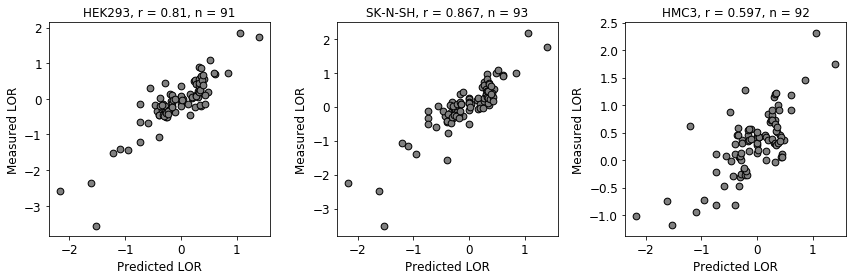

In [8]:
#Compare predictions vs. measurements, all variants, 0 to 205

from scipy.stats import spearmanr

save_figs = True
fig_name = "all_vars_predicted_vs_measured_lor_0_205"

#HEK293 measurements
hek_min_c = 50.

hek_min_ref_prox_c = 5.
hek_min_var_prox_c = 1.

hek_filtered_df = hek_df.query("ref_count_total_repl_pooled >= " + str(hek_min_c) + " and " + "var_count_total_repl_pooled >= " + str(hek_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(hek_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(hek_min_var_prox_c))

hek_true = np.array(hek_filtered_df['delta_logodds_true_0_205_repl_pooled'].values)
hek_pred = np.array(hek_filtered_df['delta_logodds_0_205'].values)

#SK-N-SH measurements
sknsh_min_c = 50.

sknsh_min_ref_prox_c = 5.
sknsh_min_var_prox_c = 1.

sknsh_filtered_df = sknsh_df.query("ref_count_total_repl_pooled >= " + str(sknsh_min_c) + " and " + "var_count_total_repl_pooled >= " + str(sknsh_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(sknsh_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(sknsh_min_var_prox_c))

sknsh_true = np.array(sknsh_filtered_df['delta_logodds_true_0_205_repl_pooled'].values)
sknsh_pred = np.array(sknsh_filtered_df['delta_logodds_0_205'].values)

#HMC3 measurements
hmc3_min_c = 50.

hmc3_min_ref_prox_c = 5.
hmc3_min_var_prox_c = 1.

hmc3_filtered_df = hmc3_df.query("ref_count_total_repl_pooled >= " + str(hmc3_min_c) + " and " + "var_count_total_repl_pooled >= " + str(hmc3_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(hmc3_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(hmc3_min_var_prox_c))

hmc3_true = np.array(hmc3_filtered_df['delta_logodds_true_0_205_repl_pooled'].values)
hmc3_pred = np.array(hmc3_filtered_df['delta_logodds_0_205'].values)

r_val_hek, _ = spearmanr(hek_pred, hek_true)
r_val_sknsh, _ = spearmanr(sknsh_pred, sknsh_true)
r_val_hmc3, _ = spearmanr(hmc3_pred, hmc3_true)

f, ax = plt.subplots(1, 3, figsize=(12, 4))

#Plot HEK293 measurements
plt.sca(ax[0])

plt.scatter(hek_pred, hek_true, color='gray', s=45, edgecolor='black', linewidth=1)

#plt.xlim(x_min, x_max)
#plt.ylim(x_min, x_max)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Predicted LOR", fontsize=12)
plt.ylabel("Measured LOR", fontsize=12)

plt.title("HEK293, r = " + str(round(r_val_hek, 3)) + ", n = " + str(hek_pred.shape[0]), fontsize=12)

#Plot SK-N-SH measurements
plt.sca(ax[1])

plt.scatter(sknsh_pred, sknsh_true, color='gray', s=45, edgecolor='black', linewidth=1)

#plt.xlim(x_min, x_max)
#plt.ylim(x_min, x_max)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Predicted LOR", fontsize=12)
plt.ylabel("Measured LOR", fontsize=12)

plt.title("SK-N-SH, r = " + str(round(r_val_sknsh, 3)) + ", n = " + str(sknsh_pred.shape[0]), fontsize=12)

#Plot HMC3 measurements
plt.sca(ax[2])

plt.scatter(hmc3_pred, hmc3_true, color='gray', s=45, edgecolor='black', linewidth=1)

#plt.xlim(x_min, x_max)
#plt.ylim(x_min, x_max)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Predicted LOR", fontsize=12)
plt.ylabel("Measured LOR", fontsize=12)

plt.title("HMC3, r = " + str(round(r_val_hmc3, 3)) + ", n = " + str(hmc3_pred.shape[0]), fontsize=12)

plt.tight_layout()

if save_figs :
    plt.savefig(fig_name + ".png", dpi=600, transparent=True)
    plt.savefig(fig_name + ".eps")

plt.show()


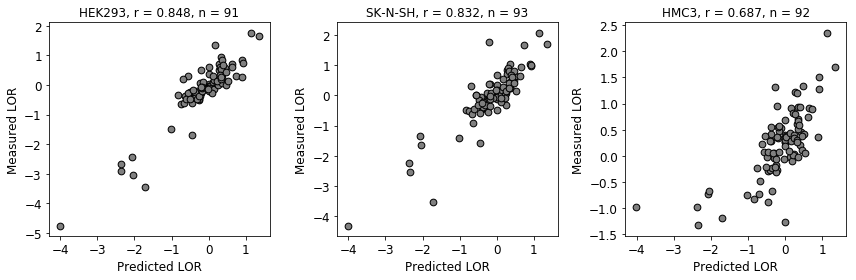

In [9]:
#Compare predictions vs. measurements, all variants, 77 to 127

from scipy.stats import spearmanr

save_figs = True
fig_name = "all_vars_predicted_vs_measured_lor_77_127"

#HEK293 measurements
hek_min_c = 50.

hek_min_ref_prox_c = 5.
hek_min_var_prox_c = 1.

hek_filtered_df = hek_df.query("ref_count_total_repl_pooled >= " + str(hek_min_c) + " and " + "var_count_total_repl_pooled >= " + str(hek_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(hek_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(hek_min_var_prox_c))

hek_true = np.array(hek_filtered_df['delta_logodds_true_77_127_repl_pooled'].values)
hek_pred = np.array(hek_filtered_df['delta_logodds_77_127'].values)

#SK-N-SH measurements
sknsh_min_c = 50.

sknsh_min_ref_prox_c = 5.
sknsh_min_var_prox_c = 1.

sknsh_filtered_df = sknsh_df.query("ref_count_total_repl_pooled >= " + str(sknsh_min_c) + " and " + "var_count_total_repl_pooled >= " + str(sknsh_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(sknsh_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(sknsh_min_var_prox_c))

sknsh_true = np.array(sknsh_filtered_df['delta_logodds_true_77_127_repl_pooled'].values)
sknsh_pred = np.array(sknsh_filtered_df['delta_logodds_77_127'].values)

#HMC3 measurements
hmc3_min_c = 50.

hmc3_min_ref_prox_c = 5.
hmc3_min_var_prox_c = 1.

hmc3_filtered_df = hmc3_df.query("ref_count_total_repl_pooled >= " + str(hmc3_min_c) + " and " + "var_count_total_repl_pooled >= " + str(hmc3_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(hmc3_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(hmc3_min_var_prox_c))

hmc3_true = np.array(hmc3_filtered_df['delta_logodds_true_77_127_repl_pooled'].values)
hmc3_pred = np.array(hmc3_filtered_df['delta_logodds_77_127'].values)

r_val_hek, _ = spearmanr(hek_pred, hek_true)
r_val_sknsh, _ = spearmanr(sknsh_pred, sknsh_true)
r_val_hmc3, _ = spearmanr(hmc3_pred, hmc3_true)

f, ax = plt.subplots(1, 3, figsize=(12, 4))

#Plot HEK293 measurements
plt.sca(ax[0])

plt.scatter(hek_pred, hek_true, color='gray', s=45, edgecolor='black', linewidth=1)

#plt.xlim(x_min, x_max)
#plt.ylim(x_min, x_max)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Predicted LOR", fontsize=12)
plt.ylabel("Measured LOR", fontsize=12)

plt.title("HEK293, r = " + str(round(r_val_hek, 3)) + ", n = " + str(hek_pred.shape[0]), fontsize=12)

#Plot SK-N-SH measurements
plt.sca(ax[1])

plt.scatter(sknsh_pred, sknsh_true, color='gray', s=45, edgecolor='black', linewidth=1)

#plt.xlim(x_min, x_max)
#plt.ylim(x_min, x_max)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Predicted LOR", fontsize=12)
plt.ylabel("Measured LOR", fontsize=12)

plt.title("SK-N-SH, r = " + str(round(r_val_sknsh, 3)) + ", n = " + str(sknsh_pred.shape[0]), fontsize=12)

#Plot HMC3 measurements
plt.sca(ax[2])

plt.scatter(hmc3_pred, hmc3_true, color='gray', s=45, edgecolor='black', linewidth=1)

#plt.xlim(x_min, x_max)
#plt.ylim(x_min, x_max)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Predicted LOR", fontsize=12)
plt.ylabel("Measured LOR", fontsize=12)

plt.title("HMC3, r = " + str(round(r_val_hmc3, 3)) + ", n = " + str(hmc3_pred.shape[0]), fontsize=12)

plt.tight_layout()

if save_figs :
    plt.savefig(fig_name + ".png", dpi=600, transparent=True)
    plt.savefig(fig_name + ".eps")

plt.show()


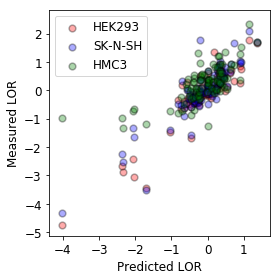

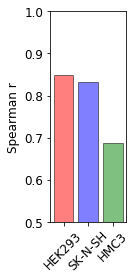

In [9]:
#Compare predictions vs. measurements, all variants, 77 to 127

from scipy.stats import spearmanr

save_figs = True
fig_name = "all_vars_predicted_vs_measured_lor_77_127_superimposed"

#HEK293 measurements
hek_min_c = 50.

hek_min_ref_prox_c = 5.
hek_min_var_prox_c = 1.

hek_filtered_df = hek_df.query("ref_count_total_repl_pooled >= " + str(hek_min_c) + " and " + "var_count_total_repl_pooled >= " + str(hek_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(hek_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(hek_min_var_prox_c))

hek_true = np.array(hek_filtered_df['delta_logodds_true_77_127_repl_pooled'].values)
hek_pred = np.array(hek_filtered_df['delta_logodds_77_127'].values)

#SK-N-SH measurements
sknsh_min_c = 50.

sknsh_min_ref_prox_c = 5.
sknsh_min_var_prox_c = 1.

sknsh_filtered_df = sknsh_df.query("ref_count_total_repl_pooled >= " + str(sknsh_min_c) + " and " + "var_count_total_repl_pooled >= " + str(sknsh_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(sknsh_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(sknsh_min_var_prox_c))

sknsh_true = np.array(sknsh_filtered_df['delta_logodds_true_77_127_repl_pooled'].values)
sknsh_pred = np.array(sknsh_filtered_df['delta_logodds_77_127'].values)

#HMC3 measurements
hmc3_min_c = 50.

hmc3_min_ref_prox_c = 5.
hmc3_min_var_prox_c = 1.

hmc3_filtered_df = hmc3_df.query("ref_count_total_repl_pooled >= " + str(hmc3_min_c) + " and " + "var_count_total_repl_pooled >= " + str(hmc3_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(hmc3_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(hmc3_min_var_prox_c))

hmc3_true = np.array(hmc3_filtered_df['delta_logodds_true_77_127_repl_pooled'].values)
hmc3_pred = np.array(hmc3_filtered_df['delta_logodds_77_127'].values)

r_val_hek, _ = spearmanr(hek_pred, hek_true)
r_val_sknsh, _ = spearmanr(sknsh_pred, sknsh_true)
r_val_hmc3, _ = spearmanr(hmc3_pred, hmc3_true)

f = plt.subplots(figsize=(4, 4))

#Plot HEK293 measurements
plt.scatter(hek_pred, hek_true, color='red', alpha=0.33, s=45, edgecolor='black', linewidth=1.5, label='HEK293')

#Plot SK-N-SH measurements
plt.scatter(sknsh_pred, sknsh_true, color='blue', alpha=0.33, s=45, edgecolor='black', linewidth=1.5, label='SK-N-SH')

#Plot HMC3 measurements
plt.scatter(hmc3_pred, hmc3_true, color='green', alpha=0.33, s=45, edgecolor='black', linewidth=1.5, label='HMC3')

#plt.xlim(x_min, x_max)
#plt.ylim(x_min, x_max)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Predicted LOR", fontsize=12)
plt.ylabel("Measured LOR", fontsize=12)

plt.legend(fontsize=12)

plt.tight_layout()

if save_figs :
    plt.savefig(fig_name + ".png", dpi=600, transparent=True)
    plt.savefig(fig_name + ".eps")

plt.show()

f = plt.figure(figsize=(2, 4))

plt.bar([0], [r_val_hek], color='red', linewidth=1, edgecolor='black', alpha=0.5)
plt.bar([1], [r_val_sknsh], color='blue', linewidth=1, edgecolor='black', alpha=0.5)
plt.bar([2], [r_val_hmc3], color='green', linewidth=1, edgecolor='black', alpha=0.5)

plt.ylim(0.5, 1.0)

plt.xticks([0, 1, 2], ['HEK293', 'SK-N-SH', 'HMC3'], fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.ylabel("Spearman r", fontsize=12)

plt.tight_layout()

if save_figs :
    plt.savefig(fig_name + "_r_vals.png", dpi=600, transparent=True)
    plt.savefig(fig_name + "_r_vals.eps")

plt.show()


        snp_id    gene_id  delta_logodds_0_205  \
16  rs78378222     TP53.9              -2.1716   
22  rs12459634   IGFLR1.1              -1.5258   
14      rs6796  KDELR2.14              -1.0956   
20  rs35979828     NFE2.1              -0.9556   
15  rs35630683   ZNF592.7              -0.3138   
18  rs16833132   KPNA1.26               0.3026   
19      rs8753   POLR2A.3               0.4854   
21   rs2732480   ZNF641.5               0.5996   

    delta_logodds_true_0_205_repl_pooled  
16                             -2.596713  
22                             -3.556974  
14                             -1.395183  
20                             -1.442611  
15                             -0.154653  
18                              0.055570  
19                              0.205128  
21                              0.740291  


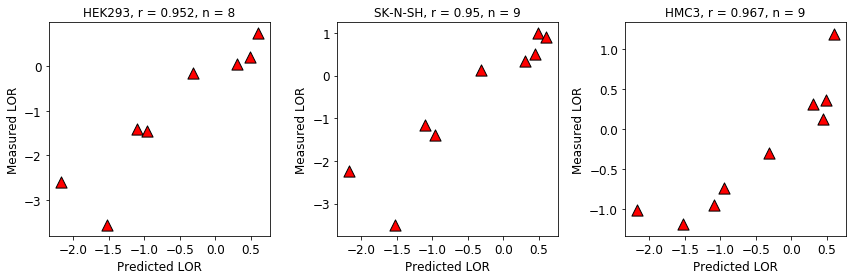

In [10]:
#Compare predictions vs. measurements, GWAS SNPs, 0 to 205

from scipy.stats import spearmanr

save_figs = True
fig_name = "GWAS_predicted_vs_measured_lor_0_205"

#HEK293 measurements
hek_min_c = 50.

hek_min_ref_prox_c = 5.
hek_min_var_prox_c = 1.

hek_filtered_df = hek_df.query("data_source == 'GWAS' and ref_count_total_repl_pooled >= " + str(hek_min_c) + " and " + "var_count_total_repl_pooled >= " + str(hek_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(hek_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(hek_min_var_prox_c))

print(hek_filtered_df.sort_values(by='delta_logodds_0_205')[['snp_id', 'gene_id', 'delta_logodds_0_205', 'delta_logodds_true_0_205_repl_pooled']])

hek_true = np.array(hek_filtered_df['delta_logodds_true_0_205_repl_pooled'].values)
hek_pred = np.array(hek_filtered_df['delta_logodds_0_205'].values)

#SK-N-SH measurements
sknsh_min_c = 50.

sknsh_min_ref_prox_c = 5.
sknsh_min_var_prox_c = 1.

sknsh_filtered_df = sknsh_df.query("data_source == 'GWAS' and ref_count_total_repl_pooled >= " + str(sknsh_min_c) + " and " + "var_count_total_repl_pooled >= " + str(sknsh_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(sknsh_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(sknsh_min_var_prox_c))

sknsh_true = np.array(sknsh_filtered_df['delta_logodds_true_0_205_repl_pooled'].values)
sknsh_pred = np.array(sknsh_filtered_df['delta_logodds_0_205'].values)

#HMC3 measurements
hmc3_min_c = 50.

hmc3_min_ref_prox_c = 5.
hmc3_min_var_prox_c = 1.

hmc3_filtered_df = hmc3_df.query("data_source == 'GWAS' and ref_count_total_repl_pooled >= " + str(hmc3_min_c) + " and " + "var_count_total_repl_pooled >= " + str(hmc3_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(hmc3_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(hmc3_min_var_prox_c))

hmc3_true = np.array(hmc3_filtered_df['delta_logodds_true_0_205_repl_pooled'].values)
hmc3_pred = np.array(hmc3_filtered_df['delta_logodds_0_205'].values)

r_val_hek, _ = spearmanr(hek_pred, hek_true)
r_val_sknsh, _ = spearmanr(sknsh_pred, sknsh_true)
r_val_hmc3, _ = spearmanr(hmc3_pred, hmc3_true)

f, ax = plt.subplots(1, 3, figsize=(12, 4))

#Plot HEK293 measurements
plt.sca(ax[0])

plt.scatter(hek_pred, hek_true, color='red', marker='^', s=125, edgecolor='black', linewidth=1)

#plt.xlim(x_min, x_max)
#plt.ylim(x_min, x_max)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Predicted LOR", fontsize=12)
plt.ylabel("Measured LOR", fontsize=12)

plt.title("HEK293, r = " + str(round(r_val_hek, 3)) + ", n = " + str(hek_pred.shape[0]), fontsize=12)

#Plot SK-N-SH measurements
plt.sca(ax[1])

plt.scatter(sknsh_pred, sknsh_true, color='red', marker='^', s=125, edgecolor='black', linewidth=1)

#plt.xlim(x_min, x_max)
#plt.ylim(x_min, x_max)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Predicted LOR", fontsize=12)
plt.ylabel("Measured LOR", fontsize=12)

plt.title("SK-N-SH, r = " + str(round(r_val_sknsh, 3)) + ", n = " + str(sknsh_pred.shape[0]), fontsize=12)

#Plot HMC3 measurements
plt.sca(ax[2])

plt.scatter(hmc3_pred, hmc3_true, color='red', marker='^', s=125, edgecolor='black', linewidth=1)

#plt.xlim(x_min, x_max)
#plt.ylim(x_min, x_max)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Predicted LOR", fontsize=12)
plt.ylabel("Measured LOR", fontsize=12)

plt.title("HMC3, r = " + str(round(r_val_hmc3, 3)) + ", n = " + str(hmc3_pred.shape[0]), fontsize=12)

plt.tight_layout()

if save_figs :
    plt.savefig(fig_name + ".png", dpi=600, transparent=True)
    plt.savefig(fig_name + ".eps")

plt.show()


        snp_id    gene_id  delta_logodds_77_127  \
16  rs78378222     TP53.9               -2.3632   
14      rs6796  KDELR2.14               -2.3504   
22  rs12459634   IGFLR1.1               -1.7076   
20  rs35979828     NFE2.1               -1.0283   
15  rs35630683   ZNF592.7               -0.4139   
18  rs16833132   KPNA1.26                0.7260   
19      rs8753   POLR2A.3                0.8946   
21   rs2732480   ZNF641.5                0.9084   

    delta_logodds_true_77_127_repl_pooled  
16                              -2.655698  
14                              -2.888136  
22                              -3.456609  
20                              -1.478624  
15                              -0.201321  
18                               0.311756  
19                               0.257417  
21                               0.839856  


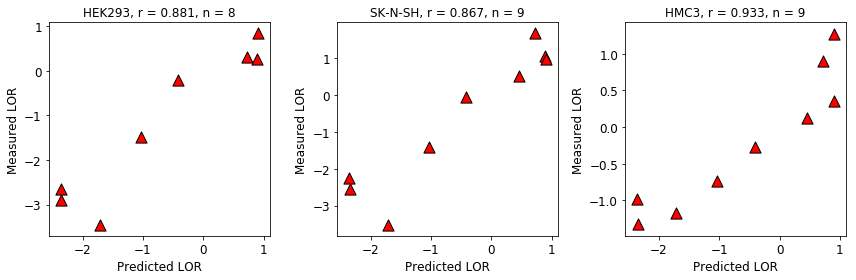

In [11]:
#Compare predictions vs. measurements, GWAS SNPs, 77 to 127

from scipy.stats import spearmanr

save_figs = True
fig_name = "GWAS_predicted_vs_measured_lor_77_127"

#HEK293 measurements
hek_min_c = 50.

hek_min_ref_prox_c = 5.
hek_min_var_prox_c = 1.

hek_filtered_df = hek_df.query("data_source == 'GWAS' and ref_count_total_repl_pooled >= " + str(hek_min_c) + " and " + "var_count_total_repl_pooled >= " + str(hek_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(hek_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(hek_min_var_prox_c))

print(hek_filtered_df.sort_values(by='delta_logodds_77_127')[['snp_id', 'gene_id', 'delta_logodds_77_127', 'delta_logodds_true_77_127_repl_pooled']])

hek_true = np.array(hek_filtered_df['delta_logodds_true_77_127_repl_pooled'].values)
hek_pred = np.array(hek_filtered_df['delta_logodds_77_127'].values)

#SK-N-SH measurements
sknsh_min_c = 50.

sknsh_min_ref_prox_c = 5.
sknsh_min_var_prox_c = 1.

sknsh_filtered_df = sknsh_df.query("data_source == 'GWAS' and ref_count_total_repl_pooled >= " + str(sknsh_min_c) + " and " + "var_count_total_repl_pooled >= " + str(sknsh_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(sknsh_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(sknsh_min_var_prox_c))

sknsh_true = np.array(sknsh_filtered_df['delta_logodds_true_77_127_repl_pooled'].values)
sknsh_pred = np.array(sknsh_filtered_df['delta_logodds_77_127'].values)

#HMC3 measurements
hmc3_min_c = 50.

hmc3_min_ref_prox_c = 5.
hmc3_min_var_prox_c = 1.

hmc3_filtered_df = hmc3_df.query("data_source == 'GWAS' and ref_count_total_repl_pooled >= " + str(hmc3_min_c) + " and " + "var_count_total_repl_pooled >= " + str(hmc3_min_c) + " and " + "ref_count_0_205_repl_pooled >= " + str(hmc3_min_ref_prox_c) + " and " + "var_count_0_205_repl_pooled >= " + str(hmc3_min_var_prox_c))

hmc3_true = np.array(hmc3_filtered_df['delta_logodds_true_77_127_repl_pooled'].values)
hmc3_pred = np.array(hmc3_filtered_df['delta_logodds_77_127'].values)

r_val_hek, _ = spearmanr(hek_pred, hek_true)
r_val_sknsh, _ = spearmanr(sknsh_pred, sknsh_true)
r_val_hmc3, _ = spearmanr(hmc3_pred, hmc3_true)

f, ax = plt.subplots(1, 3, figsize=(12, 4))

#Plot HEK293 measurements
plt.sca(ax[0])

plt.scatter(hek_pred, hek_true, color='red', marker='^', s=125, edgecolor='black', linewidth=1)

#plt.xlim(x_min, x_max)
#plt.ylim(x_min, x_max)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Predicted LOR", fontsize=12)
plt.ylabel("Measured LOR", fontsize=12)

plt.title("HEK293, r = " + str(round(r_val_hek, 3)) + ", n = " + str(hek_pred.shape[0]), fontsize=12)

#Plot SK-N-SH measurements
plt.sca(ax[1])

plt.scatter(sknsh_pred, sknsh_true, color='red', marker='^', s=125, edgecolor='black', linewidth=1)

#plt.xlim(x_min, x_max)
#plt.ylim(x_min, x_max)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Predicted LOR", fontsize=12)
plt.ylabel("Measured LOR", fontsize=12)

plt.title("SK-N-SH, r = " + str(round(r_val_sknsh, 3)) + ", n = " + str(sknsh_pred.shape[0]), fontsize=12)

#Plot HMC3 measurements
plt.sca(ax[2])

plt.scatter(hmc3_pred, hmc3_true, color='red', marker='^', s=125, edgecolor='black', linewidth=1)

#plt.xlim(x_min, x_max)
#plt.ylim(x_min, x_max)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Predicted LOR", fontsize=12)
plt.ylabel("Measured LOR", fontsize=12)

plt.title("HMC3, r = " + str(round(r_val_hmc3, 3)) + ", n = " + str(hmc3_pred.shape[0]), fontsize=12)

plt.tight_layout()

if save_figs :
    plt.savefig(fig_name + ".png", dpi=600, transparent=True)
    plt.savefig(fig_name + ".eps")

plt.show()


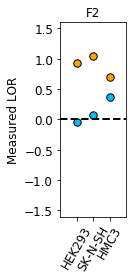

In [3]:
#Plot individual example: F2 variants (measurements, 77 to 127)

save_figs = True
fig_name = "F2_example_measured_lor_77_127"

plot_title = "F2"

test_ixs = [9, 11]
test_colors = ['orange', 'deepskyblue']

min_y = -1.6
max_y = 1.6

f = plt.figure(figsize=(2, 4))

for test_ix, test_color in zip(test_ixs, test_colors) :
    
    hek_true = hek_df.iloc[test_ix]['delta_logodds_true_77_127_repl_pooled']
    sknsh_true = sknsh_df.iloc[test_ix]['delta_logodds_true_77_127_repl_pooled']
    hmc3_true = hmc3_df.iloc[test_ix]['delta_logodds_true_77_127_repl_pooled']
    
    plt.scatter([0, 1, 2], [hek_true, sknsh_true, hmc3_true], s=55, color=test_color, edgecolor='black', linewidth=1)

plt.axhline(y=0., linewidth=2, linestyle='--', color='black')

plt.xlim(-1, 3)
plt.ylim(min_y, max_y)

plt.xticks([0, 1, 2], ["HEK293", "SK-N-SH", "HMC3"], fontsize=12, rotation=60)
plt.yticks(fontsize=12)

plt.ylabel("Measured LOR", fontsize=12)

plt.title(plot_title, fontsize=12)

plt.tight_layout()

if save_figs :
    plt.savefig(fig_name + ".png", dpi=600, transparent=True)
    plt.savefig(fig_name + ".eps")

plt.show()


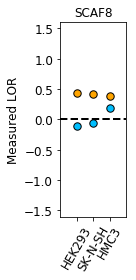

In [4]:
#Plot individual example: SCAF8 variants (measurements, 77 to 127)

save_figs = True
fig_name = "SCAF8_example_measured_lor_77_127"

plot_title = "SCAF8"

test_ixs = [99, 13]
test_colors = ['orange', 'deepskyblue']

min_y = -1.6
max_y = 1.6

f = plt.figure(figsize=(2, 4))

for test_ix, test_color in zip(test_ixs, test_colors) :
    
    hek_true = hek_df.iloc[test_ix]['delta_logodds_true_77_127_repl_pooled']
    sknsh_true = sknsh_df.iloc[test_ix]['delta_logodds_true_77_127_repl_pooled']
    hmc3_true = hmc3_df.iloc[test_ix]['delta_logodds_true_77_127_repl_pooled']
    
    plt.scatter([0, 1, 2], [hek_true, sknsh_true, hmc3_true], s=55, color=test_color, edgecolor='black', linewidth=1)

plt.axhline(y=0., linewidth=2, linestyle='--', color='black')

plt.xlim(-1, 3)
plt.ylim(min_y, max_y)

plt.xticks([0, 1, 2], ["HEK293", "SK-N-SH", "HMC3"], fontsize=12, rotation=60)
plt.yticks(fontsize=12)

plt.ylabel("Measured LOR", fontsize=12)

plt.title(plot_title, fontsize=12)

plt.tight_layout()

if save_figs :
    plt.savefig(fig_name + ".png", dpi=600, transparent=True)
    plt.savefig(fig_name + ".eps")

plt.show()


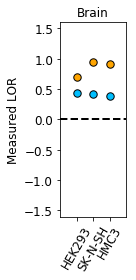

In [5]:
#Plot individual example: Brain-specific aQTL (measurements, 77 to 127)

save_figs = True
fig_name = "brain_aQTL_example_measured_lor_77_127"

plot_title = "Brain"

test_ixs = [6, 99]
test_colors = ['orange', 'deepskyblue']

min_y = -1.6
max_y = 1.6

f = plt.figure(figsize=(2, 4))

for test_ix, test_color in zip(test_ixs, test_colors) :
    
    hek_true = hek_df.iloc[test_ix]['delta_logodds_true_77_127_repl_pooled']
    sknsh_true = sknsh_df.iloc[test_ix]['delta_logodds_true_77_127_repl_pooled']
    hmc3_true = hmc3_df.iloc[test_ix]['delta_logodds_true_77_127_repl_pooled']
    
    plt.scatter([0, 1, 2], [hek_true, sknsh_true, hmc3_true], s=55, color=test_color, edgecolor='black', linewidth=1)

plt.axhline(y=0., linewidth=2, linestyle='--', color='black')

plt.xlim(-1, 3)
plt.ylim(min_y, max_y)

plt.xticks([0, 1, 2], ["HEK293", "SK-N-SH", "HMC3"], fontsize=12, rotation=60)
plt.yticks(fontsize=12)

plt.ylabel("Measured LOR", fontsize=12)

plt.title(plot_title, fontsize=12)

plt.tight_layout()

if save_figs :
    plt.savefig(fig_name + ".png", dpi=600, transparent=True)
    plt.savefig(fig_name + ".eps")

plt.show()


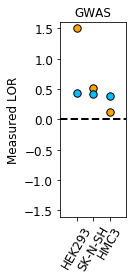

In [6]:
#Plot individual example: Brain-specific GWAS SNP (measurements, 77 to 127)

save_figs = True
fig_name = "gwas_example_measured_lor_77_127"

plot_title = "GWAS"

test_ixs = [17, 99]
test_colors = ['orange', 'deepskyblue']

min_y = -1.6
max_y = 1.6

f = plt.figure(figsize=(2, 4))

for test_ix, test_color in zip(test_ixs, test_colors) :
    
    hek_true = hek_df.iloc[test_ix]['delta_logodds_true_77_127_repl_pooled']
    sknsh_true = sknsh_df.iloc[test_ix]['delta_logodds_true_77_127_repl_pooled']
    hmc3_true = hmc3_df.iloc[test_ix]['delta_logodds_true_77_127_repl_pooled']
    
    plt.scatter([0, 1, 2], [hek_true, sknsh_true, hmc3_true], s=55, color=test_color, edgecolor='black', linewidth=1)

plt.axhline(y=0., linewidth=2, linestyle='--', color='black')

plt.xlim(-1, 3)
plt.ylim(min_y, max_y)

plt.xticks([0, 1, 2], ["HEK293", "SK-N-SH", "HMC3"], fontsize=12, rotation=60)
plt.yticks(fontsize=12)

plt.ylabel("Measured LOR", fontsize=12)

plt.title(plot_title, fontsize=12)

plt.tight_layout()

if save_figs :
    plt.savefig(fig_name + ".png", dpi=600, transparent=True)
    plt.savefig(fig_name + ".eps")

plt.show()
